<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/ANN_FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Khai báo và sử dụng các thư viện sau
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


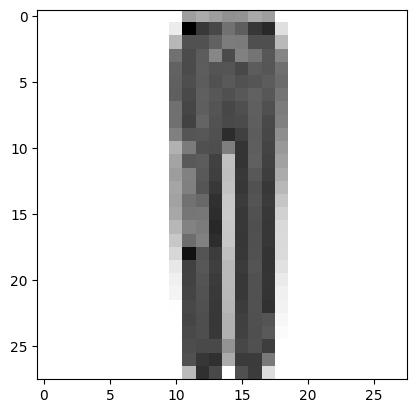

so hinh la: 1


In [54]:
digit=x_train[1000]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print('so hinh la:',y_train[1000])

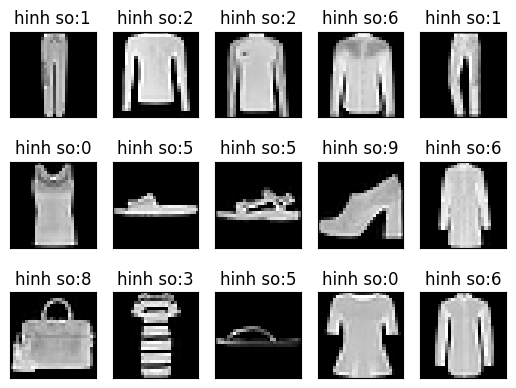

In [55]:
for i in range(15):
   plt.subplot(3,5,i+1)
   plt.tight_layout
   plt.imshow(x_train[i+1000],cmap='gray',interpolation='none')
   plt.title( 'hinh so:{}'.format(y_train[i+1000]))
   plt.xticks([])
   plt.yticks([])
     


In [56]:
from keras.models import Sequential 
from keras.layers import Dense      
model = Sequential()    
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
     

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [57]:
x_train = x_train.reshape((60000,28*28)) 
x_train = x_train.astype('float32')/255   

x_test = x_test.reshape((10000,28*28))  
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [58]:
from keras.utils import to_categorical    
y_train = to_categorical(y_train,10)  
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [59]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  
              metrics=['accuracy']) 
model.fit(x_train,y_train,epochs=20,batch_size=128)   
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.5418 - accuracy: 0.8023
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3736 - accuracy: 0.8621
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.3311 - accuracy: 0.8774
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3047 - accuracy: 0.8872
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 0.2842 - accuracy: 0.8936
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2702 - accuracy: 0.8987
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2567 - accuracy: 0.9032
Epoch 8/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2455 - accuracy: 0.9066
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2370 - accuracy: 0.9100
Epoch 10/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2287 - accura

In [60]:
model.save('fashion_mnist.h5')

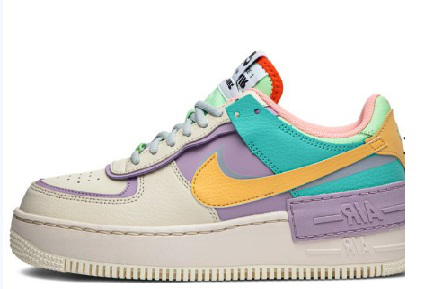

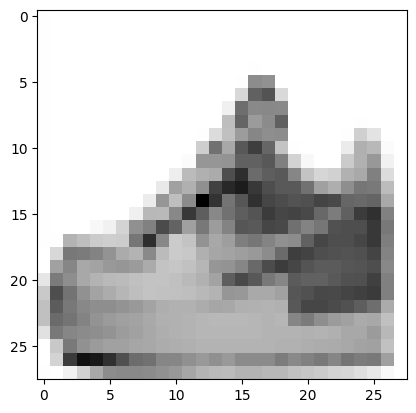

1/1 [==============================] - 0s 50ms/step


array([8])

In [61]:
from PIL import Image
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from keras.models import load_model

model = load_model('fashion_mnist.h5')


img = Image.open('/content/Untitled.jpg')
display(img)


img = img.convert('L')

img = img.resize((28,28))
plt.imshow(img, cmap= 'gray', interpolation= 'none')
plt.show()
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)